In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df['Rooms'].value_counts()

3     21812
4     11576
2     10674
5      2350
1      1670
6       283
7        36
8        19
10        6
9         2
12        2
11        1
31        1
16        1
Name: Rooms, dtype: int64

In [4]:
df1=df.query("Rooms <= 7")

In [5]:
df1['Rooms'].value_counts()

3    21812
4    11576
2    10674
5     2350
1     1670
6      283
7       36
Name: Rooms, dtype: int64

In [78]:
df['Rooms'].value_counts(normalize=True)

3     0.450354
4     0.239011
2     0.220387
5     0.048521
1     0.034481
6     0.005843
7     0.000743
8     0.000392
10    0.000124
9     0.000041
12    0.000041
11    0.000021
31    0.000021
16    0.000021
Name: Rooms, dtype: float64

In [3]:
df

,Unnamed: 0,Rooms,Price,Date,Propertycount,Distance,Qtr,Year,Type_h,Type_t,...,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Victoria,Regionname_Western Metropolitan,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,0,3,1490000.0,2017-01-04,4019,3.0,1,2017,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,3,1220000.0,2017-01-04,4019,3.0,1,2017,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,3,1420000.0,2017-01-04,4019,3.0,1,2017,1,0,...,1,0,0,0,0,0,1,0,0,0
3,3,3,1515000.0,2017-01-04,1543,7.5,1,2017,1,0,...,0,0,0,0,1,0,1,0,0,0
4,4,2,670000.0,2017-01-04,3464,10.4,1,2017,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,63016,2,347700.0,2018-03-31,17055,38.0,1,2018,0,0,...,0,1,0,0,0,0,0,0,1,0
48429,63017,3,808000.0,2018-03-31,14577,8.4,1,2018,1,0,...,1,0,0,0,0,0,1,0,0,0
48430,63018,3,566000.0,2018-03-31,5833,20.6,1,2018,1,0,...,1,0,0,0,0,0,1,0,0,0
48431,63019,3,500000.0,2018-03-31,5833,20.6,1,2018,1,0,...,1,0,0,0,0,0,1,0,0,0


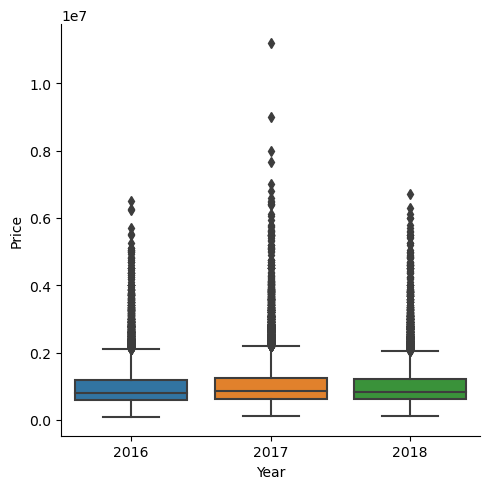

In [6]:
sns.catplot(x='Year', y='Price',kind='box',data=df1)
plt.show()

In [7]:
df1.columns

Index(['Unnamed: 0', 'Rooms', 'Price', 'Date', 'Propertycount', 'Distance',
       'Qtr', 'Year', 'Type_h', 'Type_t', 'Type_u',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Victoria',
       'Regionname_Western Metropolitan', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB'],
      dtype='object')

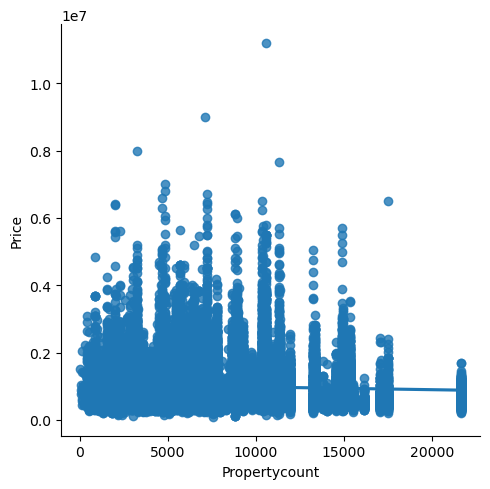

In [8]:
sns.lmplot(x="Propertycount", y="Price", data=df1)
plt.show()

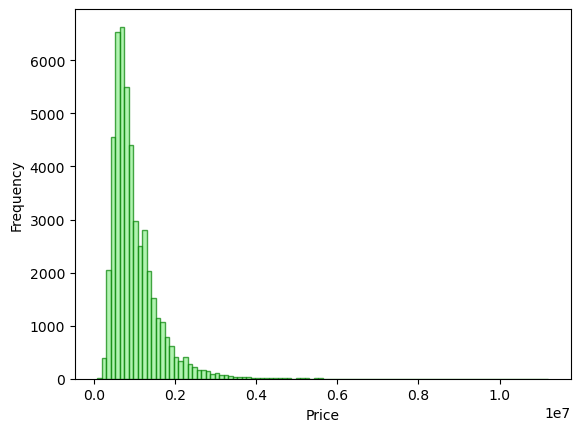

In [9]:
plt.figure()
plt.hist(df1['Price'], alpha=0.7, color='lightgreen',ec='green',bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

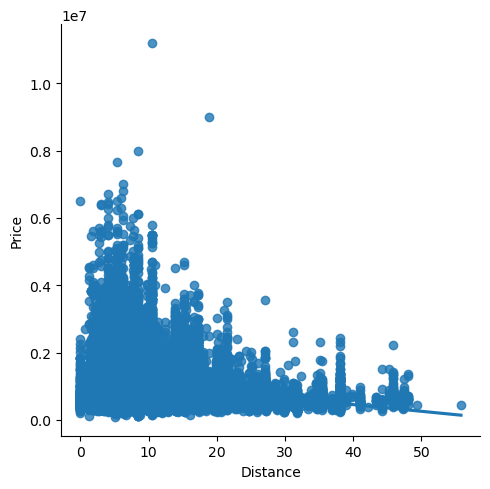

In [10]:
sns.lmplot(x="Distance", y="Price", data=df1)
plt.show()

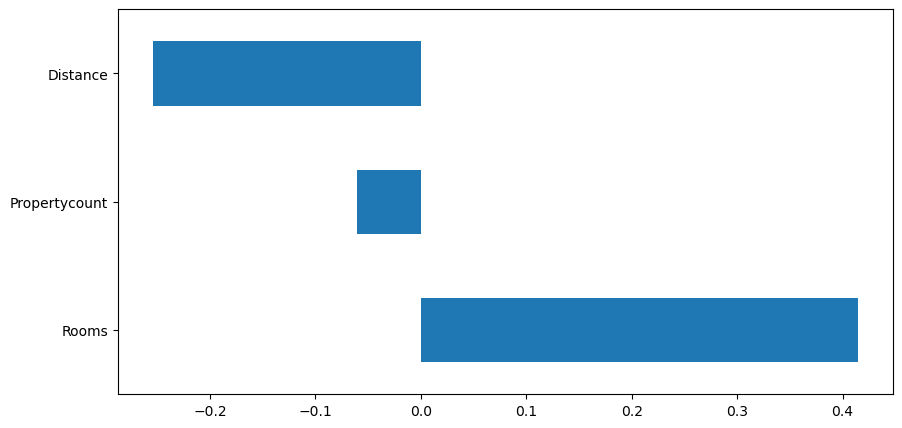

In [11]:
plt.figure(figsize=(10,5))
(df1[['Propertycount','Rooms','Distance','Price']].corr()
     .Price
     .drop('Price')
     .sort_values(ascending=False)
     .plot
     .barh())
plt.show()

In [12]:
my_r = df1[['Propertycount', 'Distance','Price']].corr(method="spearman")
print(my_r)

               Propertycount  Distance     Price
Propertycount       1.000000 -0.029497 -0.057262
Distance           -0.029497  1.000000 -0.248883
Price              -0.057262 -0.248883  1.000000


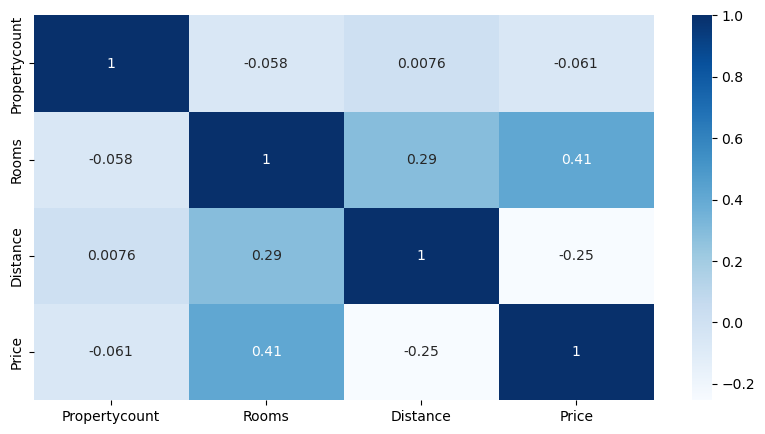

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[['Propertycount','Rooms','Distance','Price']].corr(), annot=True, cmap='Blues')
plt.show()

In [16]:
import pandas as pd
from scipy.stats import ttest_ind

cat_attrs = ['Type_h', 'Type_t', 'Type_u', 'Regionname_Eastern Metropolitan',
       'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Victoria',
       'Regionname_Western Metropolitan', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB']

# Create an empty dictionary to store the t-statistics and p-values
t_values = {}

# Loop through each categorical attribute
for attr in cat_attrs:
    # Split the data into two groups based on the categories of the attribute
    categories = df1[attr].unique()
    groups = [df1[df1[attr] == cat]['Price'] for cat in categories]
    
    # Perform the t-test
    t_statistic, p_value = ttest_ind(groups[0], groups[1], equal_var=True)
    
    # Store the results in the dictionary
    t_values[attr] = (t_statistic, p_value)

# Sort the dictionary by the absolute value of the t-statistic in descending order
sorted_t_values = sorted(t_values.items(), key=lambda x: abs(x[1][0]), reverse=True)

# Print the results
print('Categorical attributes ranked by significance:')
for attr, (t_statistic, p_value) in sorted_t_values:
    print(f'{attr}: t-statistic={t_statistic:.2f}, p-value={p_value:.2f}')

Categorical attributes ranked by significance:
Regionname_Southern Metropolitan: t-statistic=-88.82, p-value=0.00
Type_u: t-statistic=69.84, p-value=0.00
Type_h: t-statistic=67.71, p-value=0.00
Regionname_Northern Metropolitan: t-statistic=-41.14, p-value=0.00
Regionname_Western Metropolitan: t-statistic=37.07, p-value=0.00
Method_VB: t-statistic=-23.30, p-value=0.00
Method_SP: t-statistic=22.57, p-value=0.00
Regionname_Victoria: t-statistic=20.64, p-value=0.00
Regionname_South-Eastern Metropolitan: t-statistic=16.98, p-value=0.00
Regionname_Eastern Metropolitan: t-statistic=-11.88, p-value=0.00
Type_t: t-statistic=10.84, p-value=0.00
Method_PI: t-statistic=-9.71, p-value=0.00
Method_S: t-statistic=-4.92, p-value=0.00
Method_SA: t-statistic=2.62, p-value=0.01


In [18]:
dict(sorted_t_values)

{'Regionname_Southern Metropolitan': (-88.74037377592607, 0.0),
 'Type_u': (69.70229517942846, 0.0),
 'Type_h': (67.63084180806028, 0.0),
 'Regionname_Northern Metropolitan': (-41.048428671117094, 0.0),
 'Regionname_Western Metropolitan': (37.09561367255921,
  4.9182951773938394e-297),
 'Method_VB': (-23.208022190352853, 1.6799738460078965e-118),
 'Method_SP': (22.58633088000814, 2.253597639611878e-112),
 'Regionname_Victoria': (20.625282484603247, 4.138346071415002e-94),
 'Regionname_South-Eastern Metropolitan': (16.94642869954637,
  3.1343539551613915e-64),
 'Regionname_Eastern Metropolitan': (-11.83151528695908,
  2.971788932580688e-32),
 'Type_t': (10.903206410440694, 1.1981821592893951e-27),
 'Method_PI': (-9.733723781544445, 2.2699432180772663e-22),
 'Method_S': (-4.875676357044104, 1.087792188478749e-06),
 'Method_SA': (2.635532624994902, 0.008403211020719963)}

In [17]:
names = list(dict(sorted_t_values).keys())
values = list(abs(i[0]) for i in dict(sorted_t_values).values())

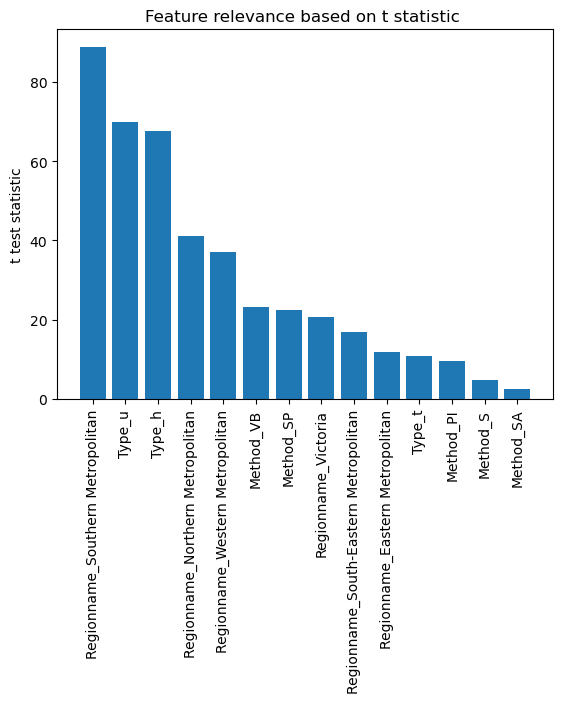

In [18]:


plt.bar(range(len(dict(sorted_t_values))), values, tick_label=names)

plt.ylabel('t test statistic')
plt.title("Feature relevance based on t statistic ")
plt.xticks(rotation = 90) 
plt.show()

In [22]:
X1=df.loc[:,['Year','Rooms',
       'Type_h', 'Type_t', 'Type_u', 'Regionname_Eastern Metropolitan',
       'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Victoria',
       'Regionname_Western Metropolitan', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB']]

In [69]:
X_copy=X

In [19]:
df1['Rooms'] = (df1['Rooms'] - df1['Rooms'].min())/(df1['Rooms'].max() - df1['Rooms'].min())

C:\Users\rangi\AppData\Local\Temp\ipykernel_15084\2200436595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rooms'] = (df1['Rooms'] - df1['Rooms'].min())/(df1['Rooms'].max() - df1['Rooms'].min())


In [20]:
df1['Propertycount'] = (df1['Propertycount'] - df1['Propertycount'].min())/(df1['Propertycount'].max() - df1['Propertycount'].min())

C:\Users\rangi\AppData\Local\Temp\ipykernel_15084\3043355014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Propertycount'] = (df1['Propertycount'] - df1['Propertycount'].min())/(df1['Propertycount'].max() - df1['Propertycount'].min())


In [21]:
df1['Distance'] = (df1['Distance'] - df1['Distance'].min())/(df1['Distance'].max() - df1['Distance'].min())

C:\Users\rangi\AppData\Local\Temp\ipykernel_15084\1737122406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Distance'] = (df1['Distance'] - df1['Distance'].min())/(df1['Distance'].max() - df1['Distance'].min())


In [23]:
df1['Year'] = (df1['Year'] - df1['Year'].min())/(df1['Year'].max() - df1['Year'].min())

C:\Users\rangi\AppData\Local\Temp\ipykernel_15084\2547225071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = (df1['Year'] - df1['Year'].min())/(df1['Year'].max() - df1['Year'].min())


In [24]:
df1

,Unnamed: 0,Rooms,Price,Date,Propertycount,Distance,Qtr,Year,Type_h,Type_t,...,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Victoria,Regionname_Western Metropolitan,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,0,0.333333,1490000.0,2017-01-04,0.184165,0.053763,1,0.5,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0.333333,1220000.0,2017-01-04,0.184165,0.053763,1,0.5,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,0.333333,1420000.0,2017-01-04,0.184165,0.053763,1,0.5,1,0,...,1,0,0,0,0,0,1,0,0,0
3,3,0.333333,1515000.0,2017-01-04,0.069594,0.134409,1,0.5,1,0,...,0,0,0,0,1,0,1,0,0,0
4,4,0.166667,670000.0,2017-01-04,0.158484,0.186380,1,0.5,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,63016,0.166667,347700.0,2018-03-31,0.787377,0.681004,1,1.0,0,0,...,0,1,0,0,0,0,0,0,1,0
48429,63017,0.333333,808000.0,2018-03-31,0.672713,0.150538,1,1.0,1,0,...,1,0,0,0,0,0,1,0,0,0
48430,63018,0.333333,566000.0,2018-03-31,0.268104,0.369176,1,1.0,1,0,...,1,0,0,0,0,0,1,0,0,0
48431,63019,0.333333,500000.0,2018-03-31,0.268104,0.369176,1,1.0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [23]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=.75)

In [24]:
#X_train

,Rooms,Propertycount,Distance,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Victoria,Regionname_Western Metropolitan,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
31451,3,4442,10.1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
9128,3,2185,10.5,0,1,0,0,0,0,0,0,1,0,1,0,0,0
23521,2,11204,6.7,0,1,0,0,1,0,0,0,0,0,0,0,0,1
47280,3,4918,4.3,0,1,0,0,0,0,0,0,1,0,0,0,1,0
15902,2,2606,11.2,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,3,21650,12.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
45891,2,11364,5.3,0,1,0,0,1,0,0,0,0,0,1,0,0,0
42613,3,6567,4.3,1,0,0,0,0,0,0,0,1,1,0,0,0,0
43567,5,10788,24.8,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [70]:
#X_train.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Type_h', 'Type_t', 'Type_u',
       'Regionname_Eastern Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Victoria',
       'Regionname_Western Metropolitan', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB'],
      dtype='object')

In [25]:
X=df1.loc[:,['Rooms', 'Propertycount', 'Distance',
       'Type_h', 'Type_t', 'Type_u', 'Regionname_Eastern Metropolitan',
       'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Victoria',
       'Regionname_Western Metropolitan', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB']]

In [26]:
y=df1.loc[:,['Price']]

In [71]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#x_train_scaled = scaler.fit_transform(X_train)
#x_train = pd.DataFrame(x_train_scaled)
#x_test_scaled = scaler.fit_transform(X_test)
#x_test = pd.DataFrame(x_test_scaled)

In [27]:
#x_train

In [43]:
model_summary=[]

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
from operator import itemgetter
for k in range(1,15):

    temp_k = dict(sorted_t_values[:k])
    top_k_features=list(temp_k.keys())
    def_features=['Rooms','Distance','Propertycount']
    features=top_k_features+def_features
    # define model
    knn_model = KNeighborsRegressor(n_neighbors=150).fit(X_train[features], y_train)
    score_knn = knn_model.score(X_test[features], y_test)

# summarize performance
    model_summary.append({'k':k,'features':features,'score':score_knn})

In [46]:
model_summary

[{'k': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.46957648122504336},
 {'k': 2,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.4849097951830941},
 {'k': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.49182194795597556},
 {'k': 4,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.49182768406194965},
 {'k': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.4918307604296075},
 {'k': 6,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h'

In [32]:
model_summary1=[]

In [47]:
from operator import itemgetter
neighbor_list=[5,10,15,20]
best_model=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,15):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors1).fit(X_train[features], y_train)
        score_knn = knn_model.score(X_test[features], y_test)

# summarize performance
        model_summary1.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'score':score_knn})
        if score_knn>score:
            score=score_knn
            best_model=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'score':score_knn}]

In [48]:
model_summary1

[{'k nearest neighbors': 5,
  'selected features': 1,
  'features': ['Type_u', 'Rooms', 'Distance', 'Propertycount'],
  'score': 0.6947753743090876},
 {'k nearest neighbors': 5,
  'selected features': 2,
  'features': ['Type_u', 'Type_h', 'Rooms', 'Distance', 'Propertycount'],
  'score': 0.717449965447605},
 {'k nearest neighbors': 5,
  'selected features': 3,
  'features': ['Type_u',
   'Type_h',
   'Regionname_Western Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.717449965447605},
 {'k nearest neighbors': 5,
  'selected features': 4,
  'features': ['Type_u',
   'Type_h',
   'Regionname_Western Metropolitan',
   'Method_SP',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.7191437491931112},
 {'k nearest neighbors': 5,
  'selected features': 5,
  'features': ['Type_u',
   'Type_h',
   'Regionname_Western Metropolitan',
   'Method_SP',
   'Regionname_Victoria',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.7191437491931112},
 {'k

In [51]:
best_model

[{'k nearest neighbors': 15,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.731355537800298}]

In [52]:
model_summary2=[]

In [53]:
from operator import itemgetter
neighbor_list=[11,12,13,14,15]
best_model2=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,15):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors1).fit(X_train[features], y_train)
        score_knn = knn_model.score(X_test[features], y_test)

# summarize performance
        model_summary2.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'score':score_knn})
        if score_knn>score:
            score=score_knn
            best_model2=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'score':score_knn}]

In [56]:
best_model2

[{'k nearest neighbors': 12,
  'selected features': 11,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Method_VB',
   'Method_SP',
   'Regionname_Victoria',
   'Regionname_South-Eastern Metropolitan',
   'Regionname_Eastern Metropolitan',
   'Type_t',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.7326684040752423}]

In [55]:
model_summary2

[{'k nearest neighbors': 11,
  'selected features': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.6763523604632318},
 {'k nearest neighbors': 11,
  'selected features': 2,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.7112197615376303},
 {'k nearest neighbors': 11,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.730317021547666},
 {'k nearest neighbors': 11,
  'selected features': 4,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.730317021547666},
 {'k nearest neighbors': 11,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Norther

In [63]:
from sklearn.neighbors import KNeighborsRegressor
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=15).fit(X_train[['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Method_VB',
   'Method_SP',
   'Regionname_Victoria',
   'Regionname_South-Eastern Metropolitan',
   'Regionname_Eastern Metropolitan',
   'Type_t',
   'Rooms',
   'Distance']], y_train)

# Score
score_knn = knn_model.score(X_test[['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Method_VB',
   'Method_SP',
   'Regionname_Victoria',
   'Regionname_South-Eastern Metropolitan',
   'Regionname_Eastern Metropolitan',
   'Type_t',
   'Rooms',
   'Distance']], y_test)
score_knn

0.7065189388674897

In [59]:
model_summary3=[]

In [60]:
from operator import itemgetter
neighbor_list=[50,55,60,65,70,75,80,85,90,95,100]
best_model3=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,15):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors1).fit(X_train[features], y_train)
        score_knn = knn_model.score(X_test[features], y_test)

# summarize performance
        model_summary3.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'score':score_knn})
        if score_knn>score:
            score=score_knn
            best_model3=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'score':score_knn}]

In [61]:
best_model3

[{'k nearest neighbors': 50,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.6829995378222764}]

In [62]:
model_summary3

[{'k nearest neighbors': 50,
  'selected features': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.6386336500394036},
 {'k nearest neighbors': 50,
  'selected features': 2,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.6674500108328452},
 {'k nearest neighbors': 50,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.6829995378222764},
 {'k nearest neighbors': 50,
  'selected features': 4,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'score': 0.6829995378222764},
 {'k nearest neighbors': 50,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_North

In [65]:
model_summary_RMSE=[]

In [68]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.090909,0.170260,0.218295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.181818,0.055548,0.266112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.181818,0.119071,0.232848,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.181818,0.496360,0.515593,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.181818,0.175731,0.133056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12104,0.181818,0.504753,0.286902,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12105,0.272727,0.672045,0.174636,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12106,0.090909,0.686419,0.056133,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12107,0.272727,0.224185,0.089397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

#model_summary_RMSE=[]

In [113]:
error = float('-inf')

from operator import itemgetter
neighbor_list=[50,55,60,65,70,75,80,85,90,95,100]
best_model_RMSE=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,16):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn = KNeighborsRegressor(n_neighbors=n_neighbors1)
        
    # Create K-Fold cross-validator
        kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
        r2_scores = cross_val_score(knn, X[features], y, cv=kf, scoring='neg_mean_squared_error')
        # Print average R-squared score
        avg_neg_mean_squared_error=np.mean(r2_scores)
        #pred=knn_model.predict(x_test[features]) #make prediction on test set
        #RMSE_error = sqrt(mean_squared_error(y_test,pred))

# summarize performance
        model_summary_RMSE.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_neg_mean_squared_error':avg_neg_mean_squared_error})
        if error<avg_neg_mean_squared_error:
            error=avg_mean_squared_error
            best_model_RMSE=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_neg_mean_squared_error':avg_neg_mean_squared_error}]

In [114]:
 best_model_RMSE

[{'k nearest neighbors': 100,
  'selected features': 13,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Method_VB',
   'Method_SP',
   'Regionname_Victoria',
   'Regionname_South-Eastern Metropolitan',
   'Regionname_Eastern Metropolitan',
   'Type_t',
   'Method_PI',
   'Method_S',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_neg_mean_squared_error': -130536023290.15178}]

In [115]:
df_RMSE_k_50_100 = pd.DataFrame(model_summary_RMSE)

In [117]:
model_summary_RMSE

[{'k nearest neighbors': 50,
  'selected features': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_neg_mean_squared_error': -122271024377.6471},
 {'k nearest neighbors': 50,
  'selected features': 2,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_neg_mean_squared_error': -112016782994.91658},
 {'k nearest neighbors': 50,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_neg_mean_squared_error': -108459807100.30557},
 {'k nearest neighbors': 50,
  'selected features': 4,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_neg_mean_squared_error': -107350803877.11565},
 {'k nearest neighbors': 50,
  'selected features': 5,
  'feature

In [116]:
df_RMSE_k_50_100

,k nearest neighbors,selected features,features,avg_neg_mean_squared_error
0,50,1,"[Regionname_Southern Metropolitan, Rooms, Dist...",-1.222710e+11
1,50,2,"[Regionname_Southern Metropolitan, Type_u, Roo...",-1.120168e+11
2,50,3,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.084598e+11
3,50,4,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.073508e+11
4,50,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.044837e+11
...,...,...,...,...
160,100,11,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.251310e+11
161,100,12,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.305419e+11
162,100,13,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.305360e+11
163,100,14,"[Regionname_Southern Metropolitan, Type_u, Typ...",-1.306192e+11


In [119]:
df_RMSE_k_50_100.to_csv('df_RMSE_k_50_100.csv')

In [112]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [107]:
best_model_RMSE

[{'k nearest neighbors': 100,
  'selected features': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_mean_squared_error': -131737449094.28897}]

In [ ]:
# Create K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
r2_scores = cross_val_score(knn, X, y, cv=kf, scoring='r2')

In [121]:
model_summary_R_k=[]

In [122]:
from operator import itemgetter
neighbor_list=[10,20,50,55,60,65,70,75,80,85,90,95,100,200,250,300]
best_model_RMSE=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,16):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn = KNeighborsRegressor(n_neighbors=n_neighbors1)
        
    # Create K-Fold cross-validator
        kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
        r2_scores = cross_val_score(knn, X[features], y, cv=kf, scoring='r2')
        # Print average R-squared score
        avg_r2_scores=np.mean(r2_scores)
        #pred=knn_model.predict(x_test[features]) #make prediction on test set
        #RMSE_error = sqrt(mean_squared_error(y_test,pred))

# summarize performance
        model_summary_R_k.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores})
        if score<avg_r2_scores:
            score=avg_r2_scores
            best_model_RMSE=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores}]

In [125]:
best_model_RMSE

[{'k nearest neighbors': 20,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.7207996484610235}]

In [126]:
model_summary_R_k

[{'k nearest neighbors': 10,
  'selected features': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.6599975688645462},
 {'k nearest neighbors': 10,
  'selected features': 2,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.6954320493814373},
 {'k nearest neighbors': 10,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.7134910291243576},
 {'k nearest neighbors': 10,
  'selected features': 4,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.7144350480674133},
 {'k nearest neighbors': 10,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
 

In [128]:
df_R_sqr_k_10_300 = pd.DataFrame(model_summary_R_k)

In [129]:
df_R_sqr_k_10_300.to_excel('df_R_sqr_k_10_300.xlsx')

In [130]:
model_summary_R_k_5_50=[]

In [131]:
from operator import itemgetter
neighbor_list=[5,10,15,20,25,30,35,40,45,50]
best_model_RMSE_k_5_50=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,16):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn = KNeighborsRegressor(n_neighbors=n_neighbors1)
        
    # Create K-Fold cross-validator
        kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
        r2_scores = cross_val_score(knn, X[features], y, cv=kf, scoring='r2')
        # Print average R-squared score
        avg_r2_scores=np.mean(r2_scores)
        #pred=knn_model.predict(x_test[features]) #make prediction on test set
        #RMSE_error = sqrt(mean_squared_error(y_test,pred))

# summarize performance
        model_summary_R_k_5_50.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores})
        if score<avg_r2_scores:
            score=avg_r2_scores
            best_model_RMSEk_k_5_50=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores}]

In [132]:
best_model_RMSEk_k_5_50

[{'k nearest neighbors': 15,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.720800169974223}]

In [134]:
df_R_k_5_50=pd.DataFrame(model_summary_R_k_5_50)

In [43]:
df.Year.value_counts()

2017    20276
2018    15072
2016    13085
Name: Year, dtype: int64

In [135]:
df_R_k_5_50.to_csv('df_R_k_5_50.csv')

In [136]:
model_summary_R_k_10_20=[]

In [137]:
from operator import itemgetter
neighbor_list=[10,11,12,13,14,1,5,16,17,18,19,20]
best_model_RMSE_k_10_20=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,16):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn = KNeighborsRegressor(n_neighbors=n_neighbors1)
        
    # Create K-Fold cross-validator
        kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
        r2_scores = cross_val_score(knn, X[features], y, cv=kf, scoring='r2')
        # Print average R-squared score
        avg_r2_scores=np.mean(r2_scores)
        #pred=knn_model.predict(x_test[features]) #make prediction on test set
        #RMSE_error = sqrt(mean_squared_error(y_test,pred))

# summarize performance
        model_summary_R_k_10_20.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores})
        if score<avg_r2_scores:
            score=avg_r2_scores
            best_model_RMSEk_k_10_20=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores}]

In [138]:
best_model_RMSEk_k_10_20

[{'k nearest neighbors': 16,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.7215596924480819}]

In [145]:
df_R_k_10_20=pd.DataFrame(model_summary_R_k_10_20)

In [148]:
df_R_k_10_20

,k nearest neighbors,selected features,features,avg_r2_scores
0,10,1,"[Regionname_Southern Metropolitan, Rooms, Dist...",0.659998
1,10,2,"[Regionname_Southern Metropolitan, Type_u, Roo...",0.695432
2,10,3,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.713491
3,10,4,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.714435
4,10,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.717809
...,...,...,...,...
175,20,11,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.699123
176,20,12,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.688434
177,20,13,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.686605
178,20,14,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.686439


In [154]:
df_R_k_10_20[df_R_k_10_20['selected features']==5]

,k nearest neighbors,selected features,features,avg_r2_scores
4,10,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.717809
19,11,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.718148
34,12,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.719321
49,13,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.720018
64,14,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.720159
79,1,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.496584
94,5,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.695483
109,16,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.721560
124,17,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.721510
139,18,5,"[Regionname_Southern Metropolitan, Type_u, Typ...",0.721181


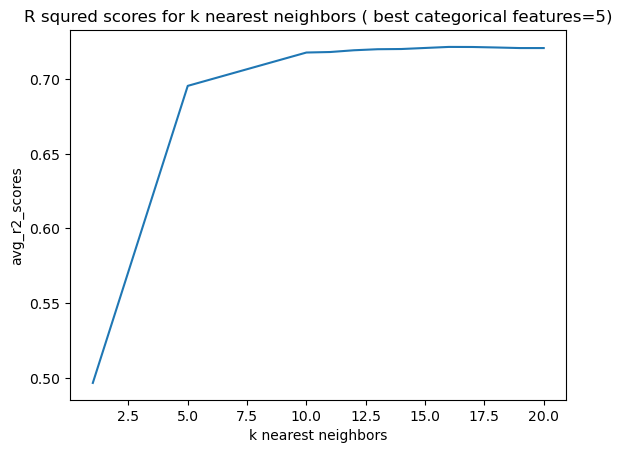

In [160]:

import seaborn
seaborn.lineplot(data=df_R_k_10_20[df_R_k_10_20['selected features']==5],x='k nearest neighbors',y='avg_r2_scores').set_title('R squred scores for k nearest neighbors ( best categorical features=5)')
plt.show()

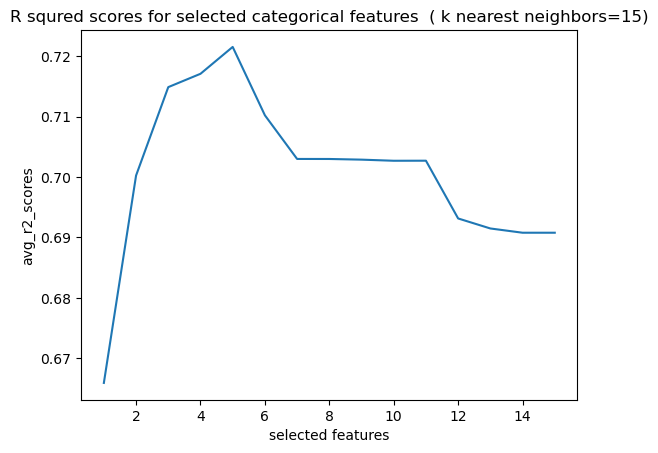

In [158]:
import seaborn
seaborn.lineplot(data=df_R_k_10_20[df_R_k_10_20['k nearest neighbors']==16],x='selected features',y='avg_r2_scores').set_title('R squred scores for selected categorical features  ( k nearest neighbors=15)')
plt.show()

In [162]:
mn_model_summary_R_k_10_20=[]

In [163]:
from operator import itemgetter
neighbor_list=[10,11,12,13,14,1,5,16,17,18,19,20]
mn_best_model_RMSE_k_10_20=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,16):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn = KNeighborsRegressor(n_neighbors=n_neighbors1,metric='manhattan')
        
    # Create K-Fold cross-validator
        kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
        r2_scores = cross_val_score(knn, X[features], y, cv=kf, scoring='r2')
        # Print average R-squared score
        avg_r2_scores=np.mean(r2_scores)
        #pred=knn_model.predict(x_test[features]) #make prediction on test set
        #RMSE_error = sqrt(mean_squared_error(y_test,pred))

# summarize performance
        mn_model_summary_R_k_10_20.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores})
        if score<avg_r2_scores:
            score=avg_r2_scores
            mn_best_model_RMSEk_k_10_20=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores}]

In [164]:
mn_best_model_RMSEk_k_10_20

[{'k nearest neighbors': 20,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Regionname_Western Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.7216783205699728}]

In [165]:
df_man_R_k_10_20=pd.DataFrame(mn_model_summary_R_k_10_20)

In [166]:
df_man_R_k_10_20.to_excel('mn_model_summary_R_k_10_20.xlsx')

In [28]:
df_man_R_k_10_20=pd.read_excel('mn_model_summary_R_k_10_20.xlsx')

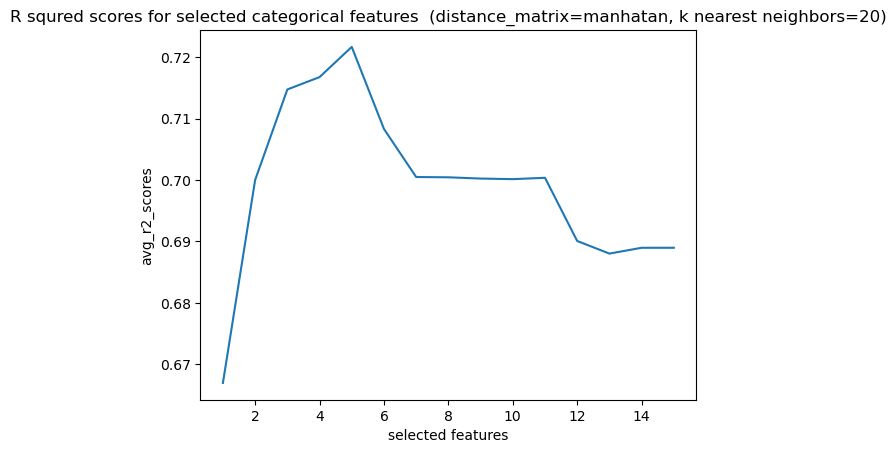

In [30]:
import seaborn
seaborn.lineplot(data=df_man_R_k_10_20[df_man_R_k_10_20['k nearest neighbors']==20],x='selected features',y='avg_r2_scores').set_title('R squred scores for selected categorical features  (distance_matrix=manhatan, k nearest neighbors=20)')
plt.show()

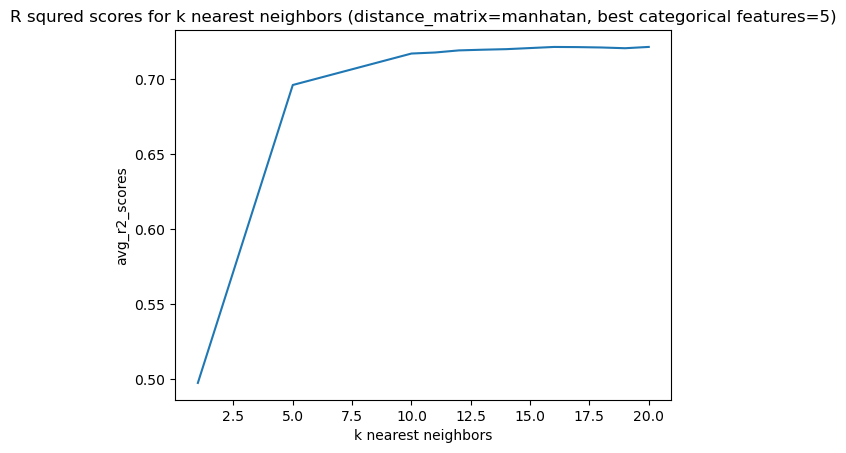

In [32]:
seaborn.lineplot(data=df_man_R_k_10_20[df_man_R_k_10_20['selected features']==5],x='k nearest neighbors',y='avg_r2_scores').set_title('R squred scores for k nearest neighbors (distance_matrix=manhatan, best categorical features=5)')
plt.show()

In [36]:
man_model_summary_R_k_5_50=[]

In [37]:
neighbor_list=[5,10,15,20,25,30,35,40,45,50]
man_best_model_RMSE_k_5_50=[]
score=0
for n_neighbors1 in neighbor_list:
    for k in range(1,16):

        temp_k = dict(sorted_t_values[:k])
        top_k_features=list(temp_k.keys())
        def_features=['Rooms','Distance','Propertycount']
        features=top_k_features+def_features
    # define model
        knn = KNeighborsRegressor(n_neighbors=n_neighbors1,metric='manhattan')
        
    # Create K-Fold cross-validator
        kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Apply cross-validation and compute scores
        r2_scores = cross_val_score(knn, X[features], y, cv=kf, scoring='r2')
        # Print average R-squared score
        avg_r2_scores=np.mean(r2_scores)
        #pred=knn_model.predict(x_test[features]) #make prediction on test set
        #RMSE_error = sqrt(mean_squared_error(y_test,pred))

# summarize performance
        man_model_summary_R_k_5_50.append({'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores})
        if score<avg_r2_scores:
            score=avg_r2_scores
            man_best_model_RMSEk_k_5_50=[{'k nearest neighbors':n_neighbors1,'selected features':k,'features':features,'avg_r2_scores':avg_r2_scores}]

In [38]:
man_best_model_RMSE_k_5_50

[]

In [39]:
man_model_summary_R_k_5_50

[{'k nearest neighbors': 5,
  'selected features': 1,
  'features': ['Regionname_Southern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.631404427866505},
 {'k nearest neighbors': 5,
  'selected features': 2,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.6750586427785301},
 {'k nearest neighbors': 5,
  'selected features': 3,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.6929970239923712},
 {'k nearest neighbors': 5,
  'selected features': 4,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Type_h',
   'Regionname_Northern Metropolitan',
   'Rooms',
   'Distance',
   'Propertycount'],
  'avg_r2_scores': 0.6941294369121686},
 {'k nearest neighbors': 5,
  'selected features': 5,
  'features': ['Regionname_Southern Metropolitan',
   'Type_u',
   'Typ

In [40]:
df_man_R_k_5_50=pd.DataFrame(man_model_summary_R_k_5_50)

In [41]:
df_man_R_k_5_50.to_excel('man_model_summary_R_k_5_50.xlsx')